In [1]:
run compute_sides_cilf.py

/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

LF_array, logLmean, zcenlist, transition, nu_rest = pickle.load(open('LFCIarr_SIDES.p','rb'))

In [3]:
#Decarli 2020 CI LF
delta_bin = 0.5 #dex 
logLprim_cen = np.array([9.2,9.3,9.4,9.5,9.6])
logLprim = np.transpose(np.array([logLprim_cen - delta_bin/2, logLprim_cen + delta_bin/2]))
LF_CI10 = 10.**np.array([[-3.32,-2.63],[-3.28,-2.61],[-3.64,-2.73],[np.nan,-2.38],[np.nan, -2.38]])
LF_CI21 = 10**np.array([[-4.04,-3.08],[-4.04,-3.08],[-4.04,-3.08],[-4.04,-3.08],[-4.04,-3.08]])

LCI10_cen = 10**logLprim_cen * 3.e-11 * 492.16**3 
LCI10 = 10**logLprim * 3.e-11 * 492.16**3 #convert to propper luminosities (Lsun)
LCI21 = 10**logLprim * 3.e-11 * 809.34**3

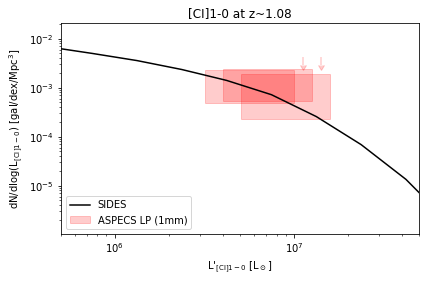

In [4]:
SIDES, = plt.plot(10.**logLmean, LF_array[:,0], 'k')

sline = '[CI]1-0'
plt.xlabel(r"L'$_{\rm "+sline+"}$ [L$_\odot$]")
plt.ylabel(r"dN/dlog(L$_{\rm "+sline+"}$) [gal/dex/Mpc$^3$]")
plt.xlim((5.e5,5.e7))
plt.xscale('log')
plt.yscale('log')

for l in range(0, 3):
    D20, = plt.fill([LCI10[l,0], LCI10[l,0], LCI10[l,1], LCI10[l,1]],
                        [LF_CI10[l,0], LF_CI10[l,1],
                         LF_CI10[l,1], LF_CI10[l,0]],
                         'r', alpha = 0.2, edgecolor = 'r')
    
for l in range(3, 5):
    
    plt.errorbar(LCI10_cen[l], LF_CI10[l,1],
                            yerr = 0.3*LF_CI10[l,1], uplims = True,
                            color = 'r', alpha = 0.2)
    
plt.title(sline+' at z~{}'.format(zcenlist[0]))

plt.legend([SIDES, D20], ['SIDES', 'ASPECS LP (1mm)'])
    
plt.tight_layout(pad=1.0, h_pad=None, w_pad=None, rect=None)
plt.savefig('LFCI10_ASPECS_SIDES.pdf', dpi = 150)
plt.show()

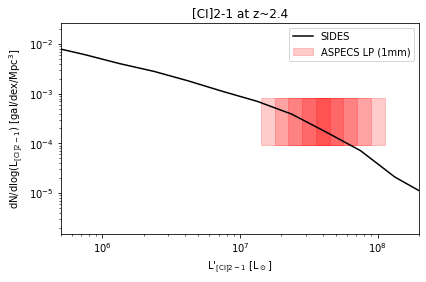

In [5]:
SIDES, = plt.plot(10.**logLmean, LF_array[:,1], 'k')

sline = '[CI]2-1'
plt.xlabel(r"L'$_{\rm "+sline+"}$ [L$_\odot$]")
plt.ylabel(r"dN/dlog(L$_{\rm "+sline+"}$) [gal/dex/Mpc$^3$]")
plt.xlim((5.e5,2.e8))
plt.xscale('log')
plt.yscale('log')

for l in range(0, 5):
    D20, = plt.fill([LCI21[l,0], LCI21[l,0], LCI21[l,1], LCI21[l,1]],
                        [LF_CI21[l,0], LF_CI21[l,1],
                         LF_CI21[l,1], LF_CI21[l,0]],
                         'r', alpha = 0.2, edgecolor = 'r')
plt.title(sline+' at z~{}'.format(zcenlist[1]))

plt.legend([SIDES, D20], ['SIDES', 'ASPECS LP (1mm)'])
    
plt.tight_layout(pad=1.0, h_pad=None, w_pad=None, rect=None)
plt.savefig('LFCI21_ASPECS_SIDES.pdf', dpi = 150)
plt.show()